## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

## Getting Insights on dataset

In [119]:
data=pd.read_csv('Appstore.csv')
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [121]:
data.shape

(17007, 18)

In [122]:
data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

In [123]:
data.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [124]:
data.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

## Performing Data Wrangling 

In [125]:
data['Genres'].unique()

array(['Games, Strategy, Puzzle', 'Games, Strategy, Board',
       'Games, Board, Strategy', ..., 'Games, Strategy, Sports, Music',
       'Social Networking, Games, Strategy, Casual',
       'Sports, Racing, Games, Strategy'], dtype=object)

In [126]:
#Dropping unwanted columns
#data.drop(['ID','URL','Subtitle','Icon URL','Description'],inplace=True,axis=1)

In [127]:
#Removing games with no  Ratings
data.rename({"Average User Rating":'Ratings','User Rating Count':'Rating counts','Genres':'Genre'},inplace=True,axis=1)
data['Ratings'].dropna(inplace=True)
data['Ratings'].isna().sum()

#Removing nan from counts from ratings
data['Rating counts'].replace(np.nan,np.mean(data['Rating counts']),inplace=True)
data['Rating counts'].isna().sum()

#Removing nan from Price
data['Price'].replace(np.nan,0,inplace=True)
data['Price'].isna().sum()

0

In [128]:
#Calculating the whether  the time difference is less than 6 months=175 days approx and Rating counts <200
data['Original Release Date']=pd.to_datetime(data['Original Release Date'])
data['Current Version Release Date']=pd.to_datetime(data['Current Version Release Date'])
data['MonthDiff']=data['Current Version Release Date']-data['Original Release Date']
#
LowCount=(data[data['Rating counts']< 200]).index & (data[data.MonthDiff < datetime.timedelta(days=175)]).index
data.drop(LowCount,inplace=True)

In [129]:
#Removing unwanted Genres(Games,Entertainment) .Remaining genres are grouped into ACTION,ADVENTURE,FAMILY,PUZZLE

data['Genre'] = data['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
data['Genre'] = data['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
data['Genre']= data['Genre'].str.strip()
DelGenre=data[~data.Genre.str.contains('Puzzle') & \
                           ~data.Genre.str.contains('Action') & \
                           ~data.Genre.str.contains('Family')& \
                           ~data.Genre.str.contains('Education')& \
                           ~data.Genre.str.contains('Family')& \
                           ~data.Genre.str.contains('Adventure')&\
                           ~data.Genre.str.contains('Board')&\
                           ~data.Genre.str.contains('Role')].index
data.drop(DelGenre, inplace=True)
#Renaming genres which still contains unwanted keywords(ex. Role,Board ,etc) into main genres.
data.loc[data['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
data.loc[data['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
data.loc[data['Genre'].str.contains('Action'),'Genre'] = 'Action'
data.loc[data['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
data.loc[data['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
data.loc[data['Genre'].str.contains('Family'),'Genre'] = 'Family'
data.loc[data['Genre'].str.contains('Education'),'Genre'] = 'Family'
data.head()

,URL,ID,Name,Subtitle,Icon URL,Ratings,Rating counts,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genre,Original Release Date,Current Version Release Date,MonthDiff
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,Puzzle,2008-11-07,2017-05-30,3126 days
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,Puzzle,2008-11-07,2018-05-17,3478 days
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,Puzzle,2008-11-07,2017-05-09,3105 days
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,Puzzle,2008-07-23,2017-05-30,3233 days
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,Puzzle,2008-07-18,2018-07-22,3656 days


In [130]:
#normalizing Size 
data['Size']=(data['Size']-np.min(data['Size']))/np.max(data['Size']-np.min(data['Size']))

### Data Visualization

<i>Getting insights on % of free and paid games for each Genre</i>

In [131]:

genre=pd.DataFrame(data['Genre'].value_counts())
genre

,Genre
Puzzle,4980
Action,1678
Adventure,1637
Family,1000


In [132]:
free  = data[data['Price'] == 0].Genre.value_counts().to_frame(name = 'free').sort_index()
free

,free
Action,1439
Adventure,1387
Family,803
Puzzle,3974


In [133]:
paid = data[data['Price']!= 0].Genre.value_counts().to_frame(name =  'paid').sort_index()
paid

,paid
Action,239
Adventure,250
Family,197
Puzzle,1006


In [134]:
data_price = genre.join(free).join(paid)
data_price['free%'] = data_price['free'] * 100/data_price['Genre']
data_price['paid%'] = data_price['paid']*100/data_price['Genre']
data_price.columns=['Total','Free','Paid','%Free','%Paid']
data_price

,Total,Free,Paid,%Free,%Paid
Puzzle,4980,3974,1006,79.799197,20.200803
Action,1678,1439,239,85.756853,14.243147
Adventure,1637,1387,250,84.728161,15.271839
Family,1000,803,197,80.300000,19.700000


[Text(0, 0.5, 'TOTAL USER RATINGS '), Text(0.5, 0, 'GENRE')]

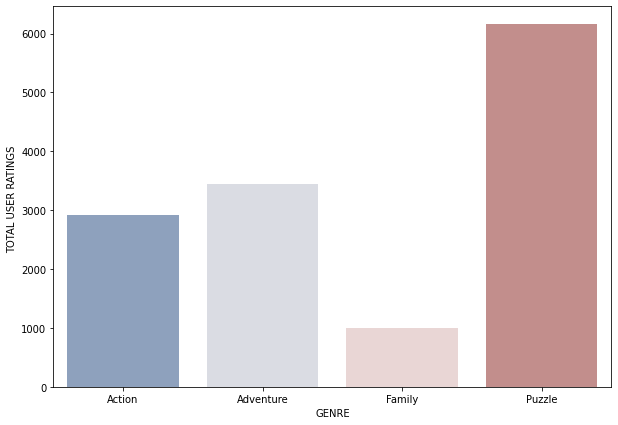

In [135]:
#PLotting barplot for Genre VS Average User Ratings

a=data.groupby(['Genre'])['Ratings'].sum().reset_index()
x=a['Genre']
y=a['Ratings']
plt.figure(figsize=(10,7))
a=sns.barplot(x,y,palette='vlag')
a.set(xlabel="GENRE",ylabel='TOTAL USER RATINGS ')

<b>Puzzle genre has got most user ratings</b>


[Text(0, 0.5, 'Number of Games'), Text(0.5, 0, 'GENRES')]

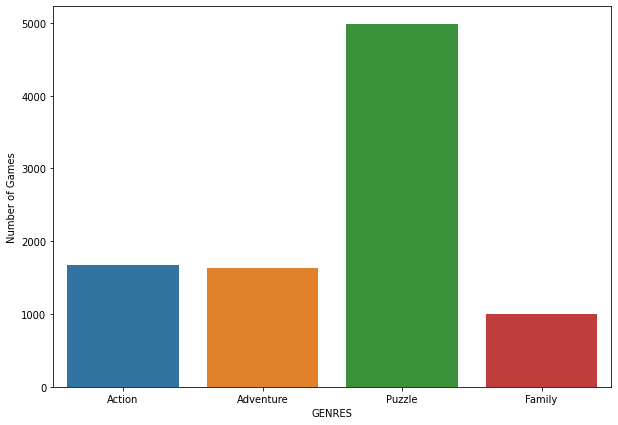

In [136]:
#Plottinh Barplot for Genre VS Number of games each genre has
x=['Action','Adventure','Puzzle','Family']
y=[data.Genre[data['Genre']=='Action'].count(),data.Genre[data['Genre']=='Adventure'].count(),data.Genre[data['Genre']=='Puzzle'].count(),data.Genre[data['Genre']=='Family'].count()]
plt.figure(figsize=(10,7))
a=sns.barplot(x,y)
a.set(xlabel='GENRES',ylabel='Number of Games')


<b>Puzzle had got most number of games</b>

[Text(0, 0.5, 'TOTAL RATING COUNTS'), Text(0.5, 0, 'GENRE')]

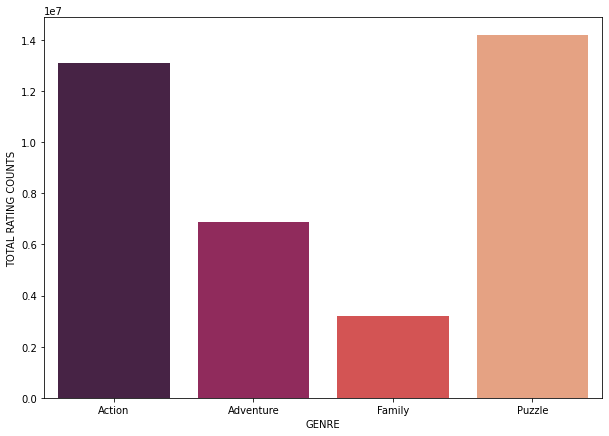

In [137]:
#PLotting barplot for Genre VS Total User Ratings

a=data.groupby(['Genre'])['Rating counts'].sum().reset_index()
x=a['Genre']
y=a['Rating counts']
plt.figure(figsize=(10,7))
a=sns.barplot(x,y,palette='rocket')
a.set(xlabel='GENRE',ylabel='TOTAL RATING COUNTS')

<b>Puzzle has most rating counts</b>

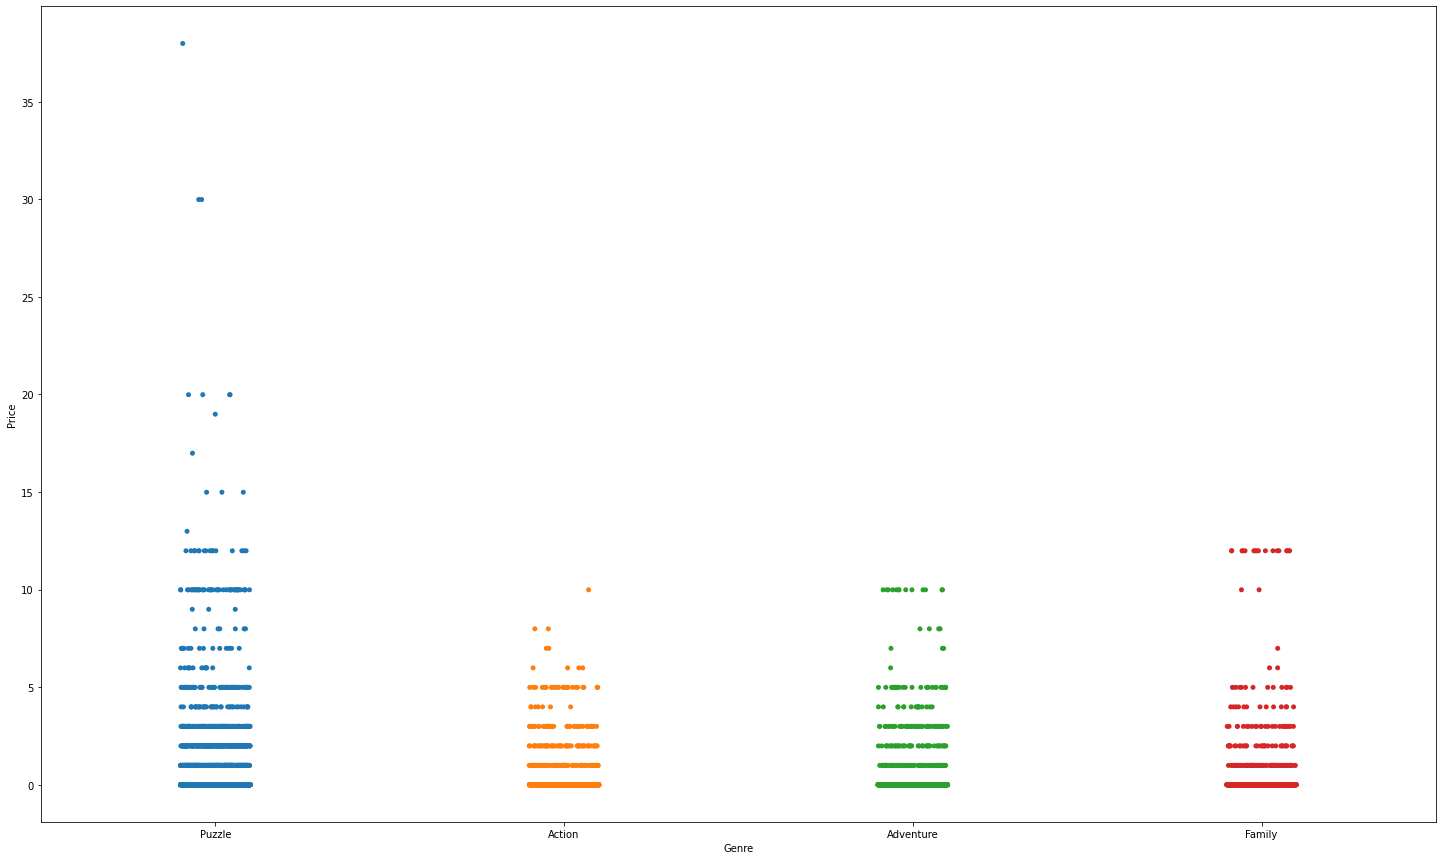

In [138]:
#Visualizing price for each Genre

plt.figure(figsize = (25,15))
sns.stripplot(data = data,y = 'Price', x = 'Genre')

[Text(0, 0.5, 'Number of Games'),
 Text(0.5, 0, 'Age Ratings'),
 Text(0.5, 1.0, 'Distrubution of Age Ratings in each Genre')]

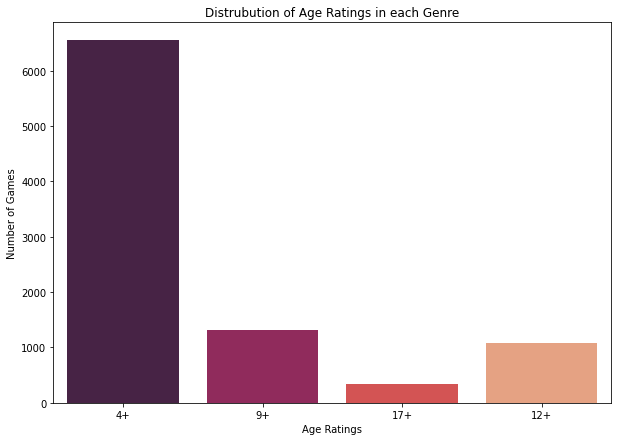

In [139]:
a=data[data['Age Rating']=='4+']
a=a.shape[0]

b=data[data['Age Rating']=='9+']
b=b.shape[0]

c=data[data['Age Rating']=='17+']
c=c.shape[0]

d=data[data['Age Rating']=='12+']
d=d.shape[0]

x=['4+','9+','17+','12+']
y=[a,b,c,d]

plt.figure(figsize=(10,7))
z=sns.barplot(x,y,palette='rocket')
z.set(xlabel='Age Ratings',ylabel='Number of Games',title=('Distrubution of Age Ratings in each Genre'))


<b>Age rating of 4+ has most number of games</b>

[Text(0.5, 1.0, 'Language VS Counts')]

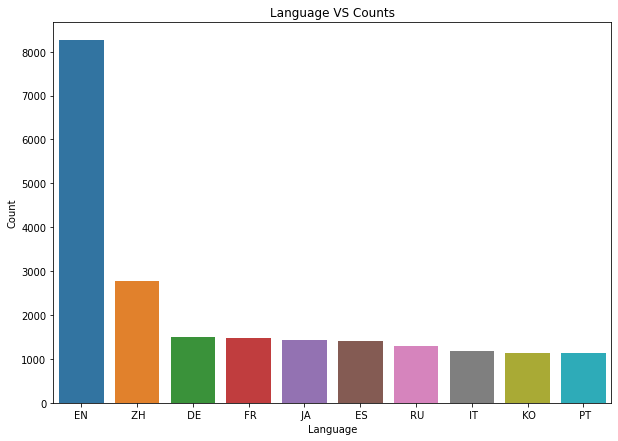

In [203]:
l=pd.DataFrame(data['Languages'].str.split(',',expand=True))
l=pd.DataFrame(l.values.ravel(),columns=['Languages'])
l= pd.DataFrame(l['Languages'].value_counts().reset_index())
l.columns = ['Language', 'Count']
plt.figure(figsize=(10,7))
a=sns.barplot(x="Language", y="Count", data=l.head(10));#taking top 10 languages
a.set(title='Language VS Counts')

<b>Most of the games has English as prime language</b>
